In [10]:
from keras.utils import to_categorical 
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os 
import pandas as pd 
import numpy  as np 

In [11]:
TRAIN_DIR = 'images/train' 
TEST_DIR = 'images/test'

In [12]:
def createdataframe(dir):
    image_paths = []
    labels = [] 
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels
    

In [55]:
train = pd.DataFrame() 
train['image'], train['label'] = createdataframe(TRAIN_DIR)

happy completed
sad completed
fear completed
surprise completed
neutral completed
angry completed
disgust completed


In [21]:
print(train)

Empty DataFrame
Columns: []
Index: []


In [59]:
test = pd.DataFrame() 
test['image'], test['label'] = createdataframe(TRAIN_DIR)

happy completed
sad completed
fear completed
surprise completed
neutral completed
angry completed
disgust completed


In [60]:
print(test)
print(test['image'])

                                image    label
0         images/train/happy/3578.jpg    happy
1        images/train/happy/16988.jpg    happy
2         images/train/happy/2666.jpg    happy
3         images/train/happy/5109.jpg    happy
4        images/train/happy/11981.jpg    happy
...                               ...      ...
28816  images/train/disgust/10112.jpg  disgust
28817  images/train/disgust/21668.jpg  disgust
28818   images/train/disgust/7049.jpg  disgust
28819   images/train/disgust/9716.jpg  disgust
28820   images/train/disgust/3561.jpg  disgust

[28821 rows x 2 columns]
0           images/train/happy/3578.jpg
1          images/train/happy/16988.jpg
2           images/train/happy/2666.jpg
3           images/train/happy/5109.jpg
4          images/train/happy/11981.jpg
                      ...              
28816    images/train/disgust/10112.jpg
28817    images/train/disgust/21668.jpg
28818     images/train/disgust/7049.jpg
28819     images/train/disgust/9716.jpg
28820     

In [61]:
from tqdm.notebook import tqdm 

In [64]:
def extract_features(images): 
    features = [] 
    for image in tqdm(images):
        img = load_img(image,grayscale = True) 
        img = np.array(img)
        features.append(img) 
    features = np.array(features) 
    features = features.reshape(len(features), 48,48,1)
    return features 
        

In [65]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

In [66]:
test_features = extract_features(test['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

In [67]:
x_train = train_features/255.0 
x_test = test_features/255.0 

In [68]:
from sklearn.preprocessing import LabelEncoder 

In [69]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [70]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])



In [72]:
y_train = to_categorical(y_train, num_classes = 7) 
y_test = to_categorical(y_test, num_classes = 7) 

In [73]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [74]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [75]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
226/226 [==============================] - 458s 2s/step - loss: 1.8259 - accuracy: 0.2434 - val_loss: 1.8146 - val_accuracy: 0.2486
Epoch 2/100
226/226 [==============================] - 452s 2s/step - loss: 1.8069 - accuracy: 0.2517 - val_loss: 1.7846 - val_accuracy: 0.2533
Epoch 3/100
226/226 [==============================] - ETA: 0s - loss: 1.7563 - accuracy: 0.2730

KeyboardInterrupt: 

In [76]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [77]:
from keras.models import model_from_json

In [79]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [80]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [81]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [82]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 [==============================] - 0s 324ms/step
model prediction is  sad


In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 44ms/step
model prediction is  sad


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


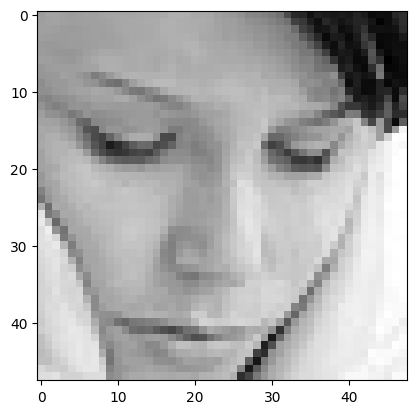

In [84]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 55ms/step
model prediction is  sad


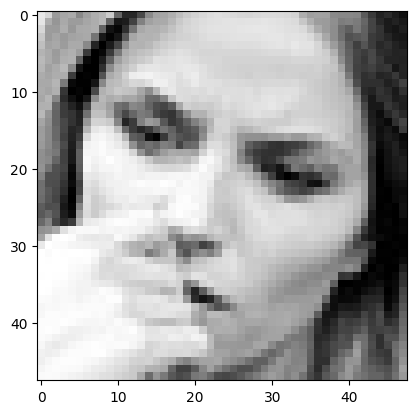

In [85]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 [==============================] - 0s 44ms/step
model prediction is  disgust


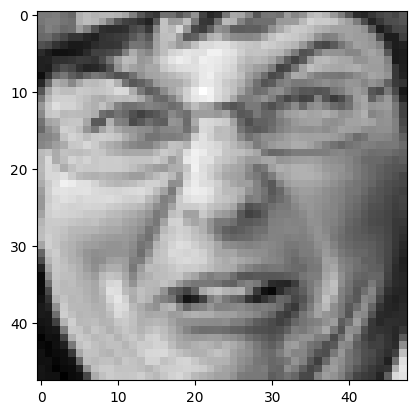

In [86]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 42ms/step
model prediction is  happy


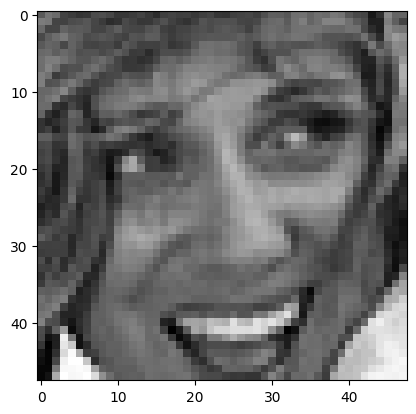

In [92]:
image = 'images/train/happy/32.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 43ms/step
model prediction is  surprise


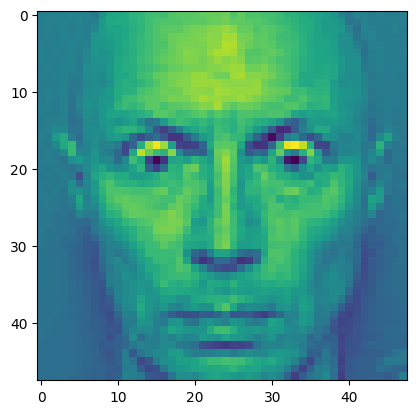

In [97]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48))